In [1]:
import utils
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict
import matplotlib.pyplot as plt


The point of this notebook is to try something different. In the real world, you will rarely have a fully labeled dataset, so most problems end up being semi-supervised (and require some unsupervised learning). 

As such, we will assume that only 6 images of each letter class is labeled, and we will use them as the initial points belonging to a cluster of images. There will be k clusters (k=26 for english and k=10 for greek) for each letter class that exists in the dataset. Then we will run K-means and see how the set will cluster the images. It would be cool to see how these images will be grouped together. Our intuition tells us that we will mostly have clusters that resemble the original classes with very some error. However, there is nothing better than empirical results so let's try it.

In [2]:
files = utils.filenames()
root_dir = utils.get_project_root_dir()

X , y = {}, {}

for lang in ['english','greek']:
    X[lang], y[lang] = utils.load_data(f"{root_dir}/{files[lang]['train']}")

    for sett in [ 'val', 'test']:
        X_tmp, y_tmp = utils.load_data(f"{root_dir}/{files['english'][sett]}")
        X[lang] = np.concatenate((X[lang],X_tmp))
        y[lang] = np.concatenate((y[lang],y_tmp))

In [3]:
def find_first_6(y):
    indices = defaultdict(list)
    for idx,label in enumerate(y):

        indices[int(label)].append(idx)
      
        if idx % 100 == 0:
            bigger_than6 = list(map(lambda i: len(i)>=6, indices.values()))
            if all(bigger_than6):
                break
    
    first6 = [indices[key][:6] for key in sorted(indices.keys())]

    return first6


In [4]:
eng_indices = find_first_6(y['english'])
greek_indices = find_first_6(y['greek'])

In [5]:
def plot_6images(imgs):
    fig = plt.figure(figsize=(32/4,32/4))
    # imgs = X[indices]
    for i,img in enumerate(imgs):
        fig.add_subplot(3,3,i+1)
        plt.imshow(img.reshape(32,32))    

In [6]:
def compute_centroid(indices,X):
    '''Generate a centroid from the points provided'''
    imgs = X[indices]
    centroid = np.average(imgs,axis=0)
    return centroid

0 [19, 68, 77, 81, 169, 179]
1 [12, 69, 93, 109, 152, 160]
2 [27, 33, 62, 85, 124, 170]
3 [8, 45, 64, 102, 159, 180]
4 [1, 9, 26, 96, 99, 120]


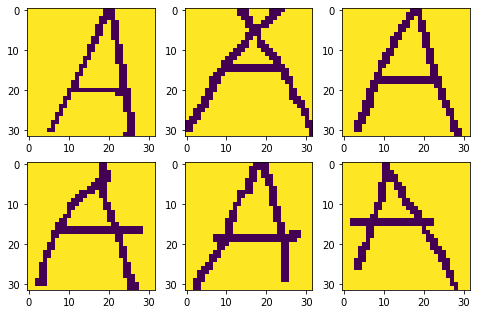

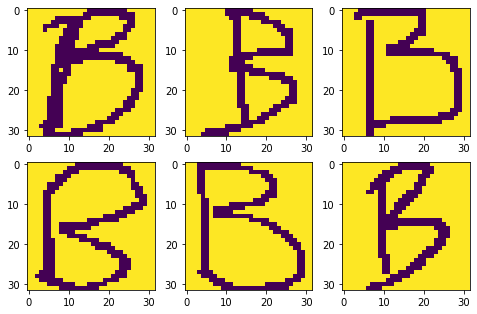

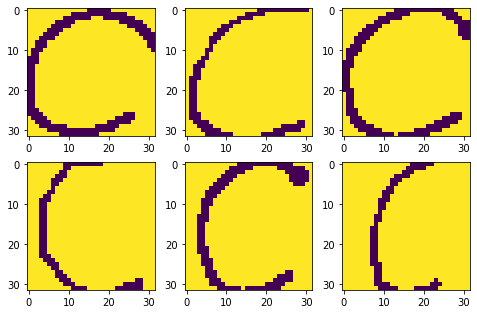

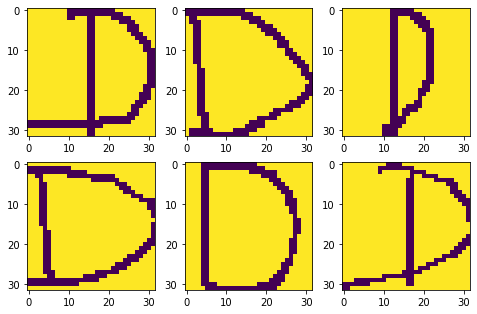

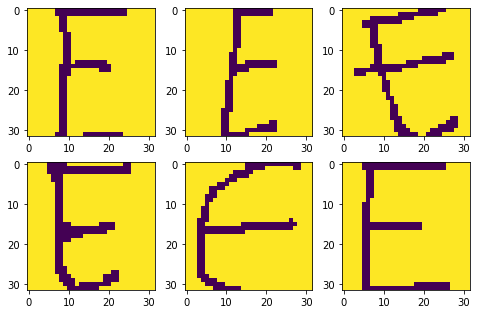

In [7]:
random_letters = list(range(5)) 
for i in random_letters:
    print(i, eng_indices[i])
    plot_6images(X['english'][eng_indices[i]])

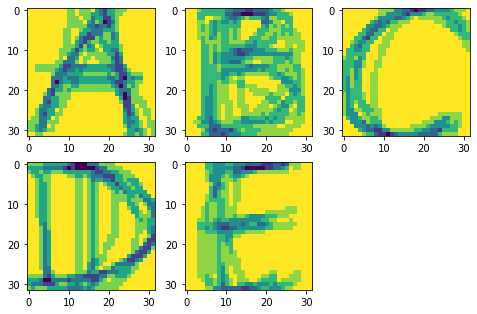

In [8]:
'''Here is what plotting the centroids looks like for each of these letter clusters'''
eng_centroids = [compute_centroid(eng_indices[i],X['english']) for i in random_letters]
plot_6images(eng_centroids)

0 [0, 17, 18, 29, 35, 36]
1 [8, 9, 13, 14, 16, 28]
2 [48, 56, 87, 93, 200, 258]
3 [6, 26, 58, 74, 86, 99]
4 [2, 7, 24, 27, 37, 41]


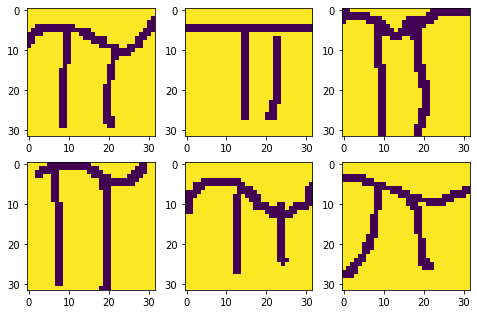

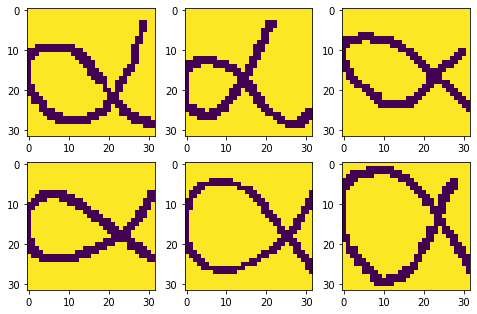

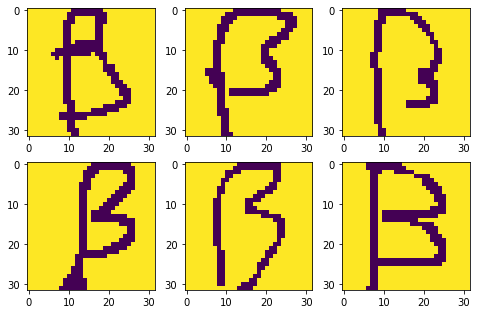

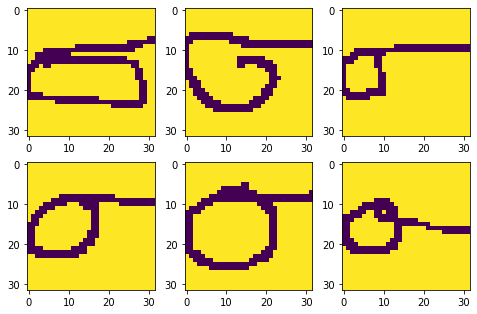

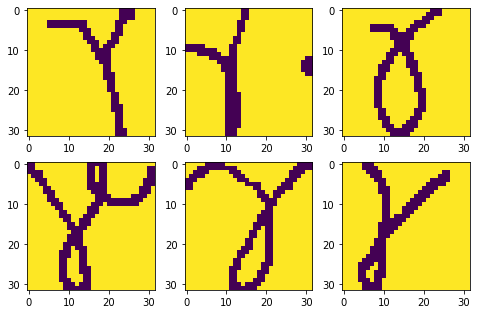

In [9]:
for i in random_letters:
    print(i, greek_indices[i])
    plot_6images(X['greek'][greek_indices[i]])

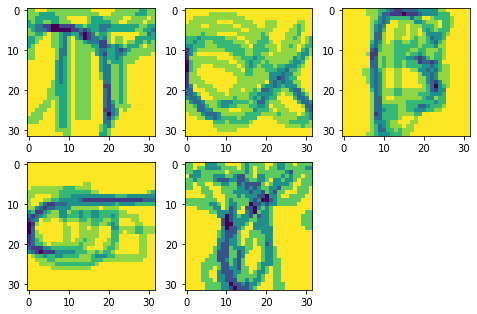

In [10]:
greek_centroids = [compute_centroid(greek_indices[i],X['greek']) for i in random_letters]
plot_6images(greek_centroids)

# Now, let's run some clustering and see what happens!!!

### First version: initialise the centroids by setting the them to distinct letters of the alphabet.
i.e, if we are using the english alphabet, there will be 26 centroids each of them will be a distinct letter. 


In [11]:
def run1(indices,X,):
    centroids = X[[i[0] for i in indices]]
    print(centroids.shape)
    assert centroids.shape == (26,1024 ) or (10,1024), f'centroids are of wrong shape {centroids.shape}'
    clusters = KMeans(n_clusters=centroids.shape[0], init=centroids, verbose=1).fit(X)
    return clusters

In [12]:
eng_clusters = run1(eng_indices, X['english'], )

(26, 1024)
Initialization complete
Iteration 0, inertia 248902.0
Iteration 1, inertia 155055.6933650358
Iteration 2, inertia 150700.1122222267
Iteration 3, inertia 148553.78296372897
Iteration 4, inertia 147335.60453541137
Iteration 5, inertia 146703.92367950676
Iteration 6, inertia 146294.5017301565
Iteration 7, inertia 146073.71076568685
Iteration 8, inertia 145861.02668497007
Iteration 9, inertia 145745.06644760817
Iteration 10, inertia 145640.5371962789
Iteration 11, inertia 145571.04223162847
Iteration 12, inertia 145543.18588535042
Iteration 13, inertia 145508.4837275281
Iteration 14, inertia 145499.87572713583
Converged at iteration 14: strict convergence.


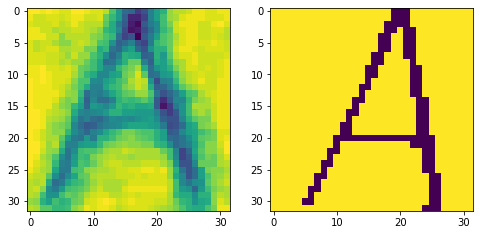

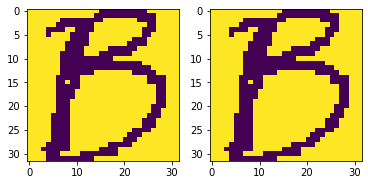

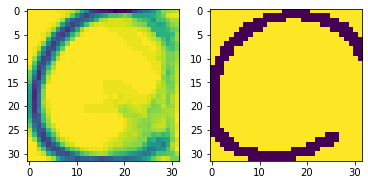

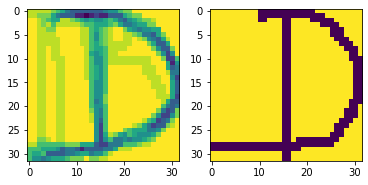

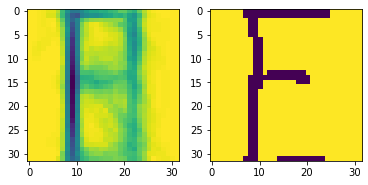

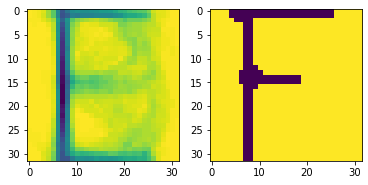

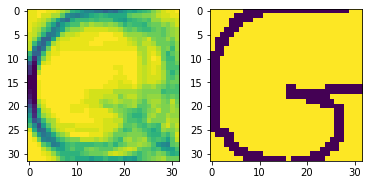

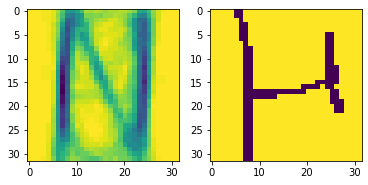

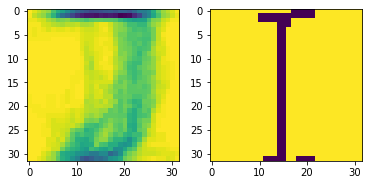

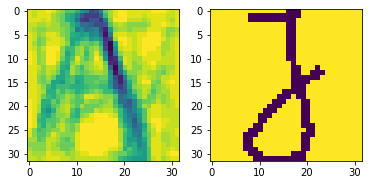

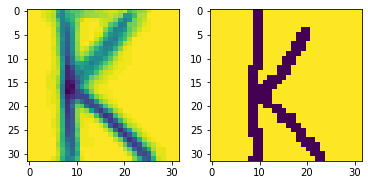

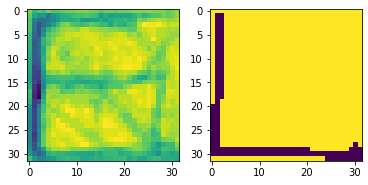

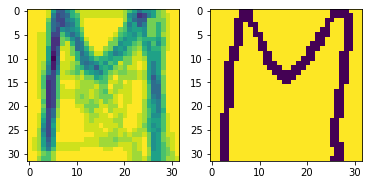

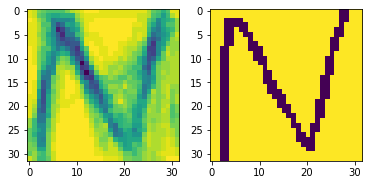

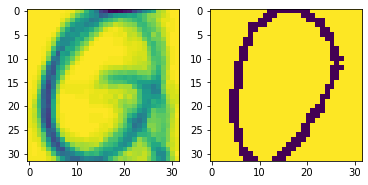

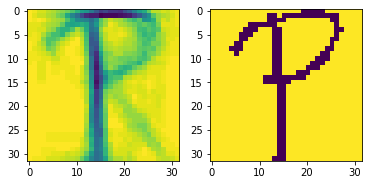

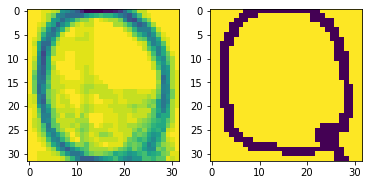

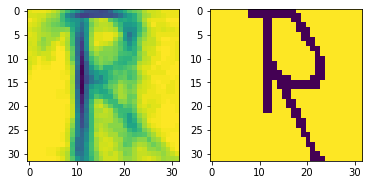

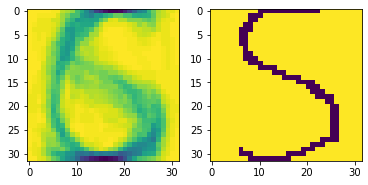

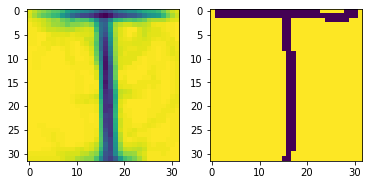

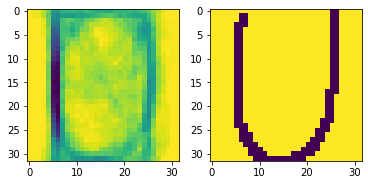

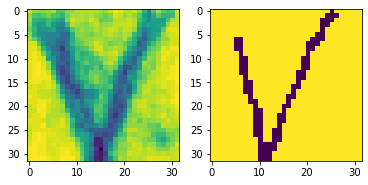

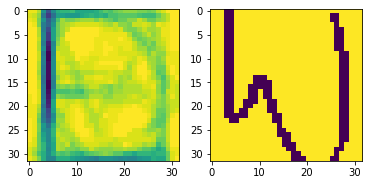

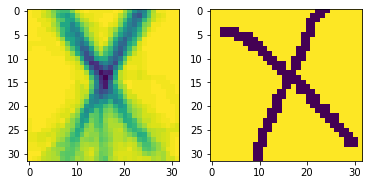

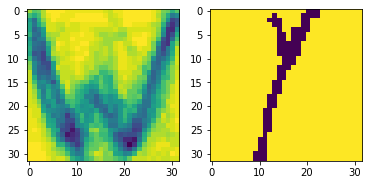

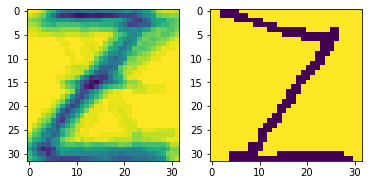

'These are the plotted centroids of after clustering the whole dataset vs the inital centroids'

In [13]:

plt.figure(figsize=(32/4,32/4))
for i,final in enumerate(eng_clusters.cluster_centers_):
    plt.subplot(1,2,1)
    plt.imshow(final.reshape(32,32),)
    plt.subplot(1,2,2)
    initial = X['english'][eng_indices[i][0]]
    plt.imshow(initial.reshape(32,32))
    plt.show()
    
'''These are the plotted centroids of after clustering the whole dataset vs the inital centroids'''

In [14]:
greek_clusters = run1(greek_indices,X['greek'])

(10, 1024)
Initialization complete
Iteration 0, inertia 1679362.0
Iteration 1, inertia 983139.8157706514
Iteration 2, inertia 966929.3668073859
Iteration 3, inertia 960318.452978787
Iteration 4, inertia 957171.4111401356
Iteration 5, inertia 956053.2145762081
Iteration 6, inertia 955478.3507056643
Iteration 7, inertia 955046.5297831091
Iteration 8, inertia 954532.7818121254
Iteration 9, inertia 953890.053918547
Iteration 10, inertia 953119.3184501407
Iteration 11, inertia 952468.8370311698
Iteration 12, inertia 951971.7577045792
Iteration 13, inertia 951521.7825391821
Iteration 14, inertia 951020.4094045
Iteration 15, inertia 950504.1989682554
Iteration 16, inertia 950057.142869879
Iteration 17, inertia 949715.7806790251
Iteration 18, inertia 949504.5879943017
Iteration 19, inertia 949349.2217635512
Iteration 20, inertia 949225.5881735942
Iteration 21, inertia 949146.6769210147
Iteration 22, inertia 949099.2598783734
Iteration 23, inertia 949062.2863392208
Iteration 24, inertia 949029.

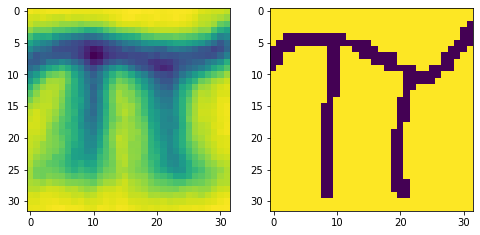

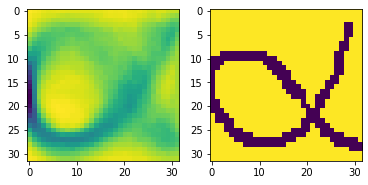

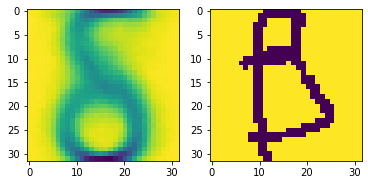

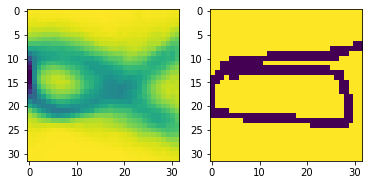

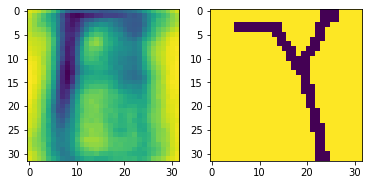

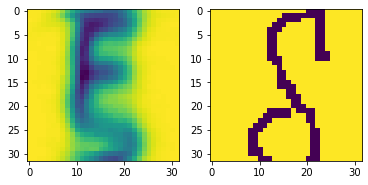

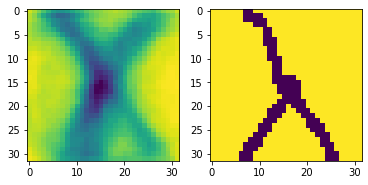

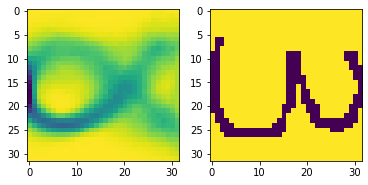

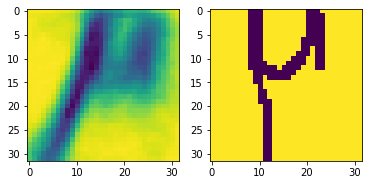

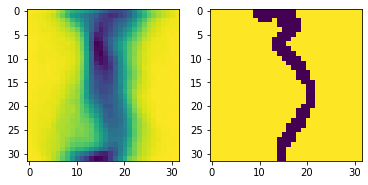

In [15]:
plt.figure(figsize=(32/4,32/4))
for i,final in enumerate(greek_clusters.cluster_centers_):
    plt.subplot(1,2,1)
    plt.imshow(final.reshape(32,32),)
    plt.subplot(1,2,2)
    initial = X['greek'][greek_indices[i][0]]
    plt.imshow(initial.reshape(32,32))
    plt.show()